In [9]:
import pandas as pd
import numpy as np
df=pd.read_csv("Walmart_Sales.csv")
df.head()
df.duplicated()
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
df["Date"]=pd.to_datetime(df["Date"], dayfirst=True)
print(df["Date"].dtype)
df.drop_duplicates()


datetime64[ns]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [33]:
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df["dayofweek"]=df["Date"].dt.dayofweek
df["dayofweek"]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,dayofweek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39,4
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42,4


In [37]:
def temp_cat(t):
    if t < 40: return 'Cold'
    if t > 80: return 'Hot'
    return 'Moderate'

df['Temp_Category'] = df['Temperature'].apply(temp_cat)


0       Moderate
1           Cold
2           Cold
3       Moderate
4       Moderate
          ...   
6430    Moderate
6431    Moderate
6432    Moderate
6433    Moderate
6434    Moderate
Name: Temp_Category, Length: 6435, dtype: object

In [39]:
df["Economic_index"]=df["Unemployment"]*df["CPI"]
df["Economic_index"]

0       1711.147080
1       1712.329028
2       1712.709792
3       1712.957025
4       1713.204258
           ...     
6430    1667.445735
6431    1665.540956
6432    1666.900409
6433    1666.931513
6434    1666.741227
Name: Economic_index, Length: 6435, dtype: float64

In [41]:
def get_season(month):
    if month in [12,1,2]: return "Winter"
    if month in [3,4,5]: return "Spring"
    if month in [6,7,8]: return "Summer"
    return "Fail"
df["Season"]=df["Month"].apply(get_season)
df["Season"]

0       Winter
1       Winter
2       Winter
3       Winter
4       Spring
         ...  
6430      Fail
6431      Fail
6432      Fail
6433      Fail
6434      Fail
Name: Season, Length: 6435, dtype: object

In [42]:
print(df.groupby('Season')['Weekly_Sales'].mean().sort_values(ascending=False))


Season
Winter    1.094937e+06
Summer    1.047623e+06
Fail      1.030432e+06
Spring    1.023801e+06
Name: Weekly_Sales, dtype: float64


In [46]:
df=df[df["Weekly_Sales"]>0]
df['Sales_in_Millions'] = df['Weekly_Sales'] / 1000000
df = df.round({'Temperature': 1, 'Fuel_Price': 2, 'CPI': 2, 'Unemployment': 2, 'Sales_in_Millions': 2})

print("Cleaning Done! Clean data shape:", df.shape)


Cleaning Done! Clean data shape: (6435, 16)


In [48]:
df["Petrol_price_high"]=df["Fuel_Price"]>df["Fuel_Price"].median()
df["Petrol_price_high"]

0       False
1       False
2       False
3       False
4       False
        ...  
6430     True
6431     True
6432     True
6433     True
6434     True
Name: Petrol_price_high, Length: 6435, dtype: bool

In [53]:
import calendar
df["Month_name"]=df["Month"].apply(lambda x: calendar.month_name[x])
df["Month_name"]
df['Is_Weekend'] = df["dayofweek"].isin([4, 5, 6]).astype(int)
df['Is_Weekend']

0       1
1       1
2       1
3       1
4       1
       ..
6430    1
6431    1
6432    1
6433    1
6434    1
Name: Is_Weekend, Length: 6435, dtype: int64

In [56]:
top_5_stores = df.groupby('Store')['Sales_in_Millions'].sum().sort_values(ascending=False).head(5)
print("Top 5 Stores:\n", top_5_stores)

Top 5 Stores:
 Store
20    301.36
4     299.58
14    288.96
13    286.54
2     275.37
Name: Sales_in_Millions, dtype: float64


In [57]:
holiday_analysis = df.groupby('Holiday_Flag')['Sales_in_Millions'].mean()
print("\nAvg Sales (0=Normal, 1=Holiday):\n", holiday_analysis)


Avg Sales (0=Normal, 1=Holiday):
 Holiday_Flag
0    1.041268
1    1.122844
Name: Sales_in_Millions, dtype: float64


In [58]:
correlation = df[['Weekly_Sales', 'Unemployment', 'CPI', 'Temperature', 'Fuel_Price']].corr()
print("\nCorrelation Matrix:\n", correlation['Weekly_Sales'])


Correlation Matrix:
 Weekly_Sales    1.000000
Unemployment   -0.106198
CPI            -0.072634
Temperature    -0.063826
Fuel_Price      0.009515
Name: Weekly_Sales, dtype: float64


In [59]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,dayofweek,Temp_Category,Economic_index,Season,Sales_in_Millions,Petrol_price_high,Month_name,Is_Weekend
0,1,2010-02-05,1643690.90,0,42.3,2.57,211.10,8.11,2,2010,5,4,Moderate,1711.147080,Winter,1.64,False,February,1
1,1,2010-02-12,1641957.44,1,38.5,2.55,211.24,8.11,2,2010,6,4,Cold,1712.329028,Winter,1.64,False,February,1
2,1,2010-02-19,1611968.17,0,39.9,2.51,211.29,8.11,2,2010,7,4,Cold,1712.709792,Winter,1.61,False,February,1
3,1,2010-02-26,1409727.59,0,46.6,2.56,211.32,8.11,2,2010,8,4,Moderate,1712.957025,Winter,1.41,False,February,1
4,1,2010-03-05,1554806.68,0,46.5,2.62,211.35,8.11,3,2010,9,4,Moderate,1713.204258,Spring,1.55,False,March,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.9,4.00,192.01,8.68,9,2012,39,4,Moderate,1667.445735,Fail,0.71,True,September,1
6431,45,2012-10-05,733455.07,0,64.9,3.98,192.17,8.67,10,2012,40,4,Moderate,1665.540956,Fail,0.73,True,October,1
6432,45,2012-10-12,734464.36,0,54.5,4.00,192.33,8.67,10,2012,41,4,Moderate,1666.900409,Fail,0.73,True,October,1
6433,45,2012-10-19,718125.53,0,56.5,3.97,192.33,8.67,10,2012,42,4,Moderate,1666.931513,Fail,0.72,True,October,1


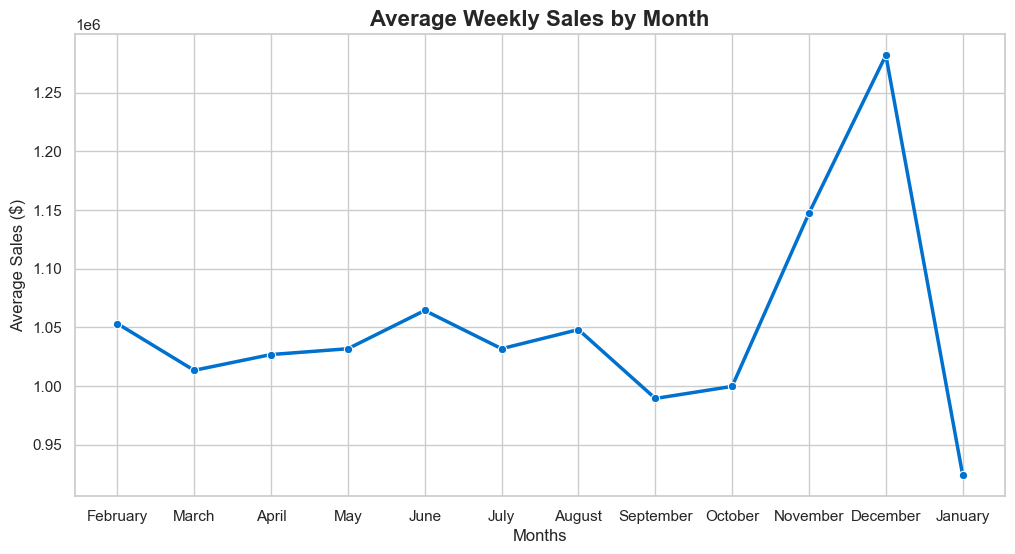

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

monthly_sales = df.groupby('Month_name', sort=False)['Weekly_Sales'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=2.5, color='#0071ce') # Walmart Blue Color
plt.title('Average Weekly Sales by Month', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Average Sales ($)', fontsize=12)
plt.savefig('monthly_trend.png', dpi=300) # Iska screenshot lelo
plt.show()

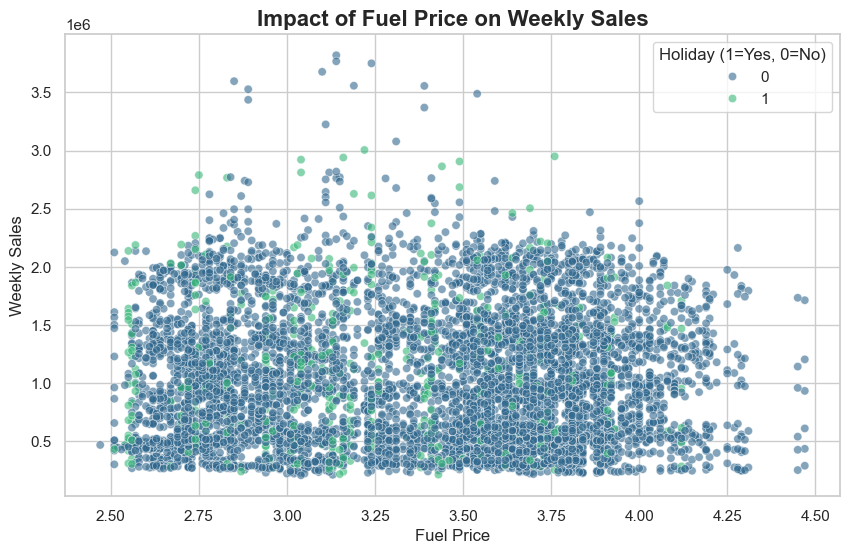

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', hue='Holiday_Flag', palette='viridis', alpha=0.6)
plt.title('Impact of Fuel Price on Weekly Sales', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Price', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.legend(title='Holiday (1=Yes, 0=No)')
plt.savefig('fuel_vs_sales.png', dpi=300)
plt.show()